In [1]:
!pip install nltk


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [3]:
import nltk
import pandas as pd
import string
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
nltk.download('vader_lexicon')
nltk.download('stopwords') 

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/nikshubhakumar/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nikshubhakumar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords

analyzer = SentimentIntensityAnalyzer()

In [6]:
# crypto = 'crypto_bitcoin'
# crypto = 'crypto_ethereum'
crypto = 'crypto_xrp'

In [5]:
list_subs = ['ethereum','ethermining','ethfinance','eth','ethtrader']
subreddit = 'ethereum'

In [6]:
sentiment_counts = pd.DataFrame(columns=['Subreddit','Positive','Neutral','Negative'])
sentiment_counts

,Subreddit,Positive,Neutral,Negative


In [7]:
def remove_punctuation(input):
    return input.translate(str.maketrans({key: None for key in string.punctuation}))

# Function to clean up text before performing sentiment analysis
def processText(row):
    result = row["selftext"].lower()
        
    # Remove punctuations
    result = remove_punctuation(result)
            
    # Tokenize sentence into words
    tokens = nltk.word_tokenize(result)
                  
    # Remove common English language stop words
    englishStopWords = set(stopwords.words('english'))
    filteredTokens = [w for w in tokens if not w in englishStopWords]
      
    # Join tokenized words back into sentences
    finalResult = ' '.join([x for x in filteredTokens])
       
    return finalResult

def map_sentiment(score):
    if -1 <= score <= -0.5:
        return 'Negative'
    elif 0.5 < score <= 1:
        return 'Positive'
    else:
        return 'Neutral'

In [8]:
# colors = {'Negative': '#A675A1', 'Neutral': '#CEA2AC', 'Positive': '#8F3985'}

colors = {'Negative': '#A675A1', 'Neutral': '#DCCDE8', 'Positive': '#8F3985'}

/var/folders/2l/h6ht9_t96fn33pfzbxcdp_dm0000gn/T/ipykernel_36294/2274550211.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sentiment_counts=sentiment_counts.append({'Subreddit':subreddit,'Positive':pos_count,'Negative':neg_count,'Neutral':neu_count},ignore_index=True)


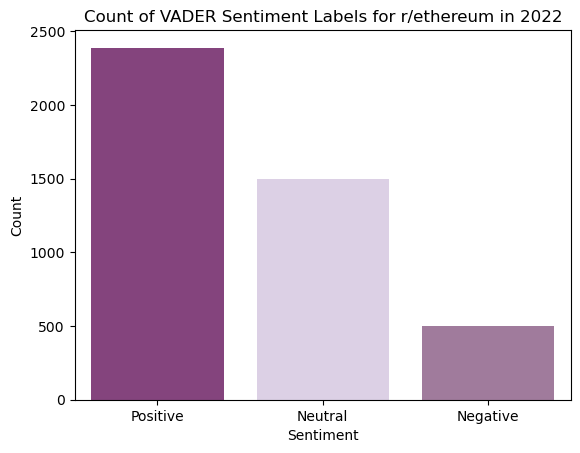

/var/folders/2l/h6ht9_t96fn33pfzbxcdp_dm0000gn/T/ipykernel_36294/2274550211.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sentiment_counts=sentiment_counts.append({'Subreddit':subreddit,'Positive':pos_count,'Negative':neg_count,'Neutral':neu_count},ignore_index=True)


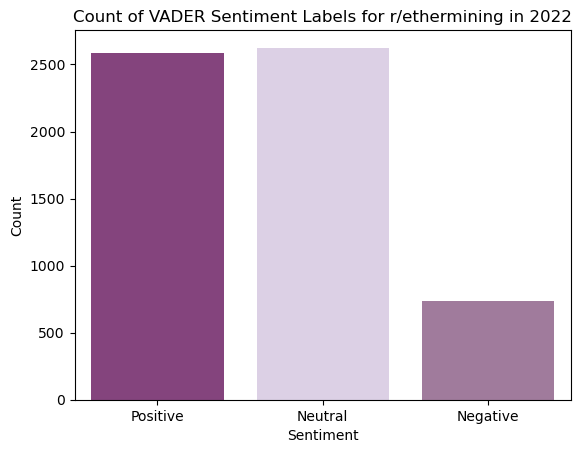

/var/folders/2l/h6ht9_t96fn33pfzbxcdp_dm0000gn/T/ipykernel_36294/2274550211.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sentiment_counts=sentiment_counts.append({'Subreddit':subreddit,'Positive':pos_count,'Negative':neg_count,'Neutral':neu_count},ignore_index=True)


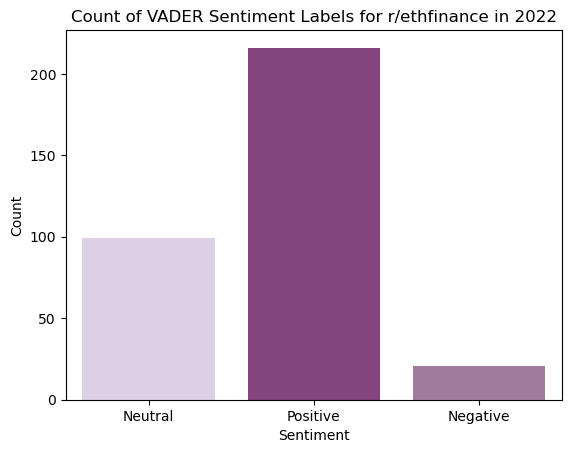

/var/folders/2l/h6ht9_t96fn33pfzbxcdp_dm0000gn/T/ipykernel_36294/2274550211.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sentiment_counts=sentiment_counts.append({'Subreddit':subreddit,'Positive':pos_count,'Negative':neg_count,'Neutral':neu_count},ignore_index=True)


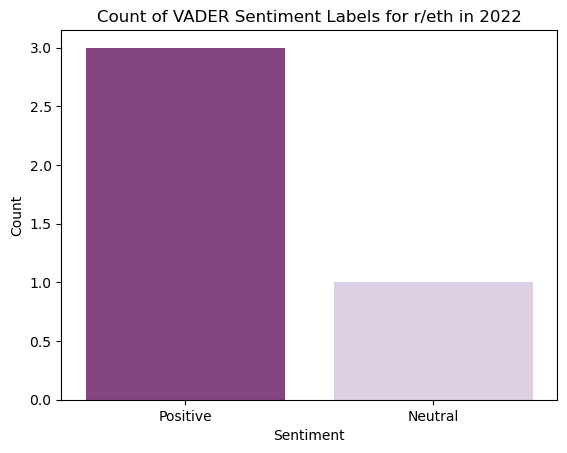

/var/folders/2l/h6ht9_t96fn33pfzbxcdp_dm0000gn/T/ipykernel_36294/2274550211.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sentiment_counts=sentiment_counts.append({'Subreddit':subreddit,'Positive':pos_count,'Negative':neg_count,'Neutral':neu_count},ignore_index=True)


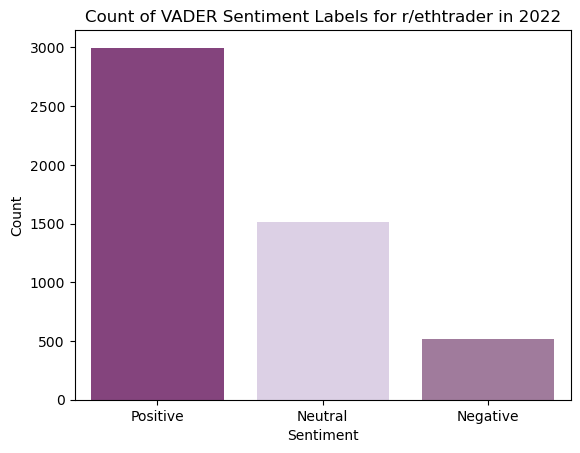

In [9]:
for subreddit in list_subs: 
    df = pd.read_csv(f"Data/Cleaned_Data/{crypto}/submission_and_comments/{subreddit}_submission.csv")
    df['cleaned_text'] = df.apply(processText, axis=1)
    df['VADER_Score']=df['selftext'].map(lambda txt : analyzer.polarity_scores(txt)['compound'])
    df['VADER_Sentiment'] = df['VADER_Score'].apply(map_sentiment)
    try: 
        pos_count = df['VADER_Sentiment'].value_counts()['Positive']
    except:
        pos_count = 0
    try: 
        neg_count = df['VADER_Sentiment'].value_counts()['Negative']
    except:
        neg_count = 0
    try: 
        neu_count = df['VADER_Sentiment'].value_counts()['Neutral']
    except:
        neu_count = 0
    sentiment_counts=sentiment_counts.append({'Subreddit':subreddit,'Positive':pos_count,'Negative':neg_count,'Neutral':neu_count},ignore_index=True)
    sns.countplot(data=df, x='VADER_Sentiment',palette=colors)
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.title(f'Count of VADER Sentiment Labels for r/{subreddit} in 2022')
    plt.savefig(f"Data/Sentiment/{crypto}/VADER/plots/{subreddit}_submission_vader_sentiment.png")
    plt.show()
    df[['submission','VADER_Score','VADER_Sentiment']].to_csv(f"Data/Sentiment/{crypto}/VADER/{subreddit}_submission_vader_sentiment.csv",index=False)


In [10]:
sentiment_counts

,Subreddit,Positive,Neutral,Negative
0,ethereum,2387,1494,497
1,ethermining,2585,2625,738
2,ethfinance,216,99,21
3,eth,3,1,0
4,ethtrader,2997,1514,515


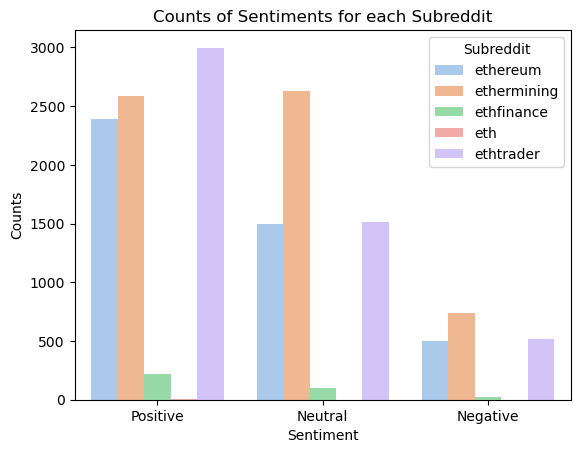

In [16]:
df_melted = sentiment_counts.melt(id_vars='Subreddit', var_name='Sentiment', value_name='Counts')

# Define colors for each subreddit
colors = sns.color_palette("pastel", n_colors=len(df))

# Create the bar plot
sns.barplot(data=df_melted, x='Sentiment', y='Counts', hue='Subreddit', palette=colors)

# Add labels and title
plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.title('Counts of Sentiments for each Subreddit')

# Show the legend
plt.legend(title='Subreddit')
plt.savefig(f"Data/Sentiment/{crypto}/VADER/plots/vader_sentiment.png")
# Show the plot
plt.show()